### ECONOMIC INDICATORS DATA PRE-PROCESSING 

* Oil_price: 
* USD Index:
* Interest Rate:
* Inflation Rate:
* Bond Yield:


### Data Collection & Pre-processing

In [47]:
# importing all the required library
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


import warnings
warnings.filterwarnings('ignore')

In [48]:
#import sentiment and Gold the dataset
US_Dollar_Index = pd.read_csv('datafile/marketwatchdir/numeric_data/US_Dollar_Index_Data.csv')
Oil_Price = pd.read_csv('datafile/marketwatchdir/numeric_data/Oil_Price_Data.csv')
Bond_Yield = pd.read_csv('datafile/marketwatchdir/numeric_data/Bond_Yield_Data.csv')
interest_rate = pd.read_csv('datafile/marketwatchdir/numeric_data/interest_rate.csv')
inflation_rate = pd.read_csv('datafile/marketwatchdir/numeric_data/inflation_rate_data.csv')

### Overview of all the features

In [50]:
# first few records of the US_Dollar dataset
US_Dollar_Index.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,10/18/2024,103.49,103.81,103.81,103.46,NaN,-0.33%
1,10/17/2024,103.83,103.56,103.87,103.44,NaN,0.23%
2,10/16/2024,103.59,103.26,103.61,103.17,NaN,0.32%
3,10/15/2024,103.26,103.21,103.34,103.03,NaN,-0.04%
4,10/14/2024,103.30,102.92,103.36,102.93,NaN,0.40%


In [51]:
# first few records of the oil_price dataset
Oil_Price.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,10/18/2024,69.22,70.75,71.23,68.69,NaN,-2.05%
1,10/17/2024,70.67,70.68,71.11,69.44,188.16K,0.40%
2,10/16/2024,70.39,70.99,71.31,69.64,222.44K,-0.27%
3,10/15/2024,70.58,71.51,72.12,69.71,328.74K,-4.40%
4,10/14/2024,73.83,75.05,75.08,71.81,273.46K,-2.29%


In [52]:
# first few records of the Bond Yield dataset
Bond_Yield.head()

,Date,Price,Open,High,Low,Change %
0,10/18/2024,4.075,4.093,4.118,4.065,-0.51%
1,10/17/2024,4.096,4.022,4.100,4.018,1.99%
2,10/16/2024,4.016,4.037,4.043,3.995,-0.54%
3,10/15/2024,4.038,4.100,4.104,4.026,-0.86%
4,10/11/2024,4.073,4.069,4.118,4.059,-0.51%


In [53]:
# first few records of the interest rate dataset
interest_rate.head()

,date,value
0,9/18/2024,5.33
1,9/17/2024,5.33
2,9/16/2024,5.33
3,9/13/2024,5.33
4,9/12/2024,5.33


In [54]:
# first few records of the inflation rate dataset
inflation_rate.head()

,date,inflation_rate
0,2010-01-04,2.38
1,2010-01-05,2.34
2,2010-01-06,2.37
3,2010-01-07,2.41
4,2010-01-08,2.42


### OBSERVATION
* USD rate, oil_price, and Bond yeild includes additional columns ('Open', 'High', 'Low', 'Change %')



### Data cleaning and preprocessing of US_Dollar_Index dataset

In [57]:
# make a copy of the datafram
df_US_Dollar_Index = US_Dollar_Index.copy()
df_US_Dollar_Index.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,10/18/2024,103.49,103.81,103.81,103.46,NaN,-0.33%
1,10/17/2024,103.83,103.56,103.87,103.44,NaN,0.23%
2,10/16/2024,103.59,103.26,103.61,103.17,NaN,0.32%
3,10/15/2024,103.26,103.21,103.34,103.03,NaN,-0.04%
4,10/14/2024,103.30,102.92,103.36,102.93,NaN,0.40%


In [58]:
df_US_Dollar_Index.shape

(3861, 7)

In [59]:
df_US_Dollar_Index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3861 entries, 0 to 3860
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3861 non-null   object 
 1   Price     3861 non-null   float64
 2   Open      3861 non-null   float64
 3   High      3861 non-null   float64
 4   Low       3861 non-null   float64
 5   Vol.      0 non-null      float64
 6   Change %  3861 non-null   object 
dtypes: float64(5), object(2)
memory usage: 211.3+ KB


In [60]:
#function to clean dataset with the addition numeric value and change the datetype to datetime
def clean_data(df):
    df = df.drop(columns = ['Open','High','Low','Vol.','Change %'])
    df['Date']=pd.to_datetime(df['Date'])
    return df

In [61]:
df_US_Dollar_Index = clean_data(df_US_Dollar_Index)
df_US_Dollar_Index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3861 entries, 0 to 3860
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3861 non-null   datetime64[ns]
 1   Price   3861 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 60.5 KB


In [62]:
#rename the column name to match with others
df_US_Dollar_Index.rename(columns={'Date':'date','Price':'usd_rate'}, inplace=True)

In [63]:
# check for duplicate records
df_US_Dollar_Index.duplicated().sum()

0

In [64]:
#statistical overview of the dataset
df_US_Dollar_Index.describe()

,date,usd_rate
count,3861,3861.000000
mean,2017-05-27 19:33:42.377622272,92.019961
min,2010-01-04 00:00:00,72.930000
25%,2013-09-16 00:00:00,81.970000
50%,2017-05-29 00:00:00,94.340000
75%,2021-02-05 00:00:00,98.500000
max,2024-10-18 00:00:00,114.110000
std,NaN,9.304187


In [65]:
# Function to visualize numeric variables
def visualize_numeric(df):
    numeric_cols = df.select_dtypes(include=['float64']).columns
    
    # Histogram for each numeric variable
    df[numeric_cols].hist(figsize=(8, 5), bins=20)
    plt.suptitle('Histograms of Numeric Variables')
    plt.show()

    # Box plots for each numeric variable
    plt.figure(figsize=(8, 5))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(len(numeric_cols), 1, i)
        sns.boxplot(x=df[col])
        plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()

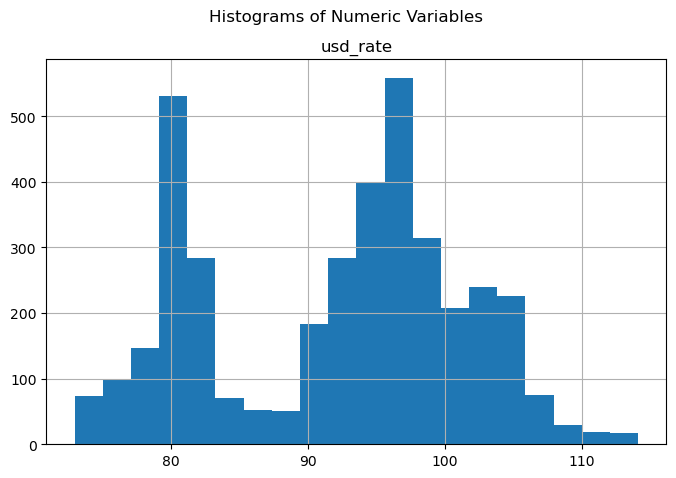

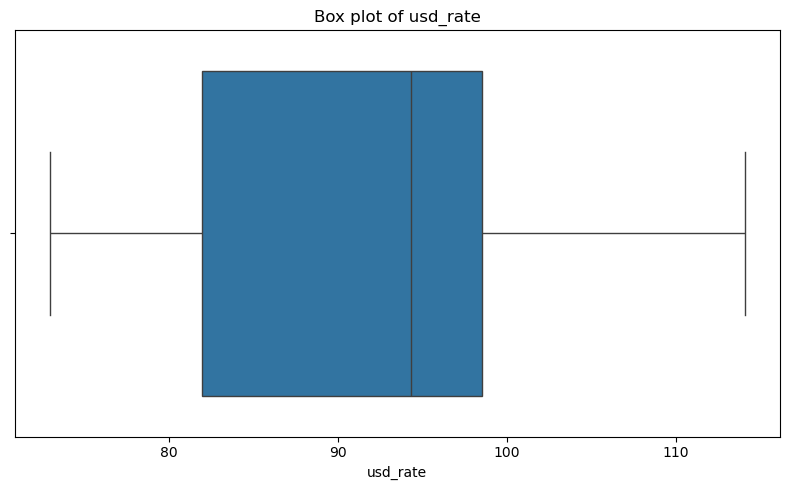

In [66]:
visualize_numeric(df_US_Dollar_Index)

In [84]:
df_US_Dollar_Index_clean = df_US_Dollar_Index.copy()
df_US_Dollar_Index_clean.sort_values(by ='date', inplace=True)
df_US_Dollar_Index_clean.head()

,date,usd_rate
3860,2010-01-04,77.53
3859,2010-01-05,77.62
3858,2010-01-06,77.49
3857,2010-01-07,77.91
3856,2010-01-08,77.47


<Figure size 1400x700 with 0 Axes>

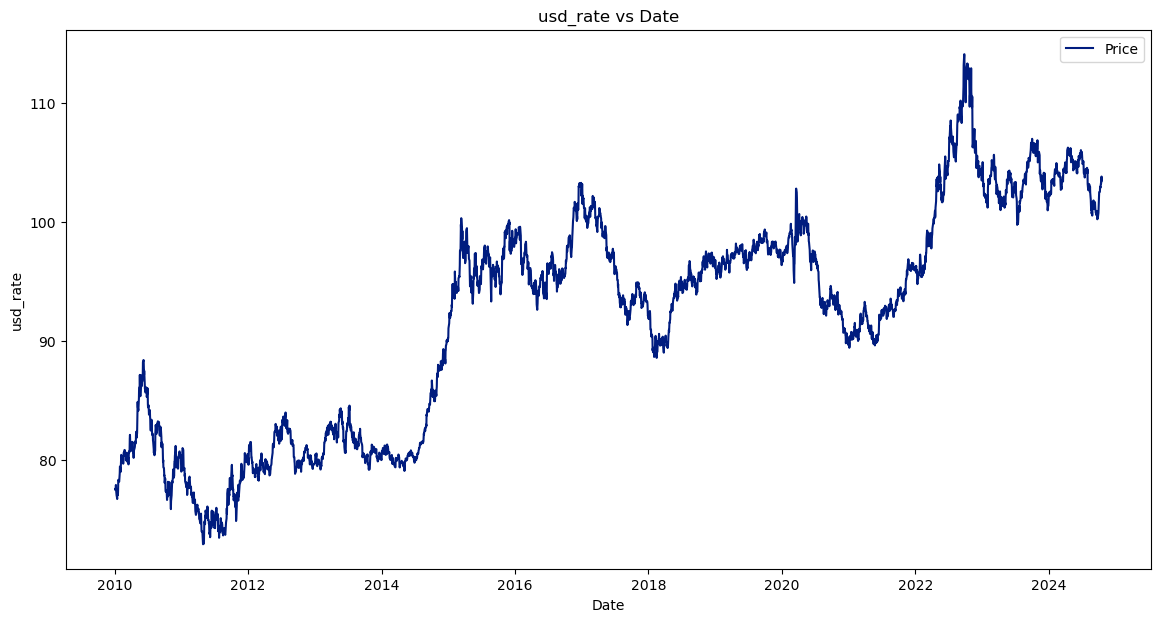

In [86]:
# visualization of the dollar rate over time
plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(14, 7))

plt.figure(figsize=(14, 7))
plt.plot(df_US_Dollar_Index_clean['date'],df_US_Dollar_Index_clean['usd_rate'],label='Price')
plt.title('usd_rate vs Date')
plt.xlabel('Date')
plt.ylabel('usd_rate')
plt.legend()
plt.show();

### Data cleaning and preprocessing of Oil_Price dataset

In [88]:
# make a copy of the dataset
df_Oil_Price = Oil_Price.copy()
df_Oil_Price.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,10/18/2024,69.22,70.75,71.23,68.69,NaN,-2.05%
1,10/17/2024,70.67,70.68,71.11,69.44,188.16K,0.40%
2,10/16/2024,70.39,70.99,71.31,69.64,222.44K,-0.27%
3,10/15/2024,70.58,71.51,72.12,69.71,328.74K,-4.40%
4,10/14/2024,73.83,75.05,75.08,71.81,273.46K,-2.29%


In [90]:
# dataset dimension
df_Oil_Price.shape

(3857, 7)

In [92]:
df_Oil_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3857 entries, 0 to 3856
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3857 non-null   object 
 1   Price     3857 non-null   float64
 2   Open      3857 non-null   float64
 3   High      3857 non-null   float64
 4   Low       3857 non-null   float64
 5   Vol.      3726 non-null   object 
 6   Change %  3857 non-null   object 
dtypes: float64(4), object(3)
memory usage: 211.1+ KB


In [94]:
#apply the clean_data function to remove the unwanted columns
df_Oil_Price = clean_data(df_Oil_Price)
df_Oil_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3857 entries, 0 to 3856
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3857 non-null   datetime64[ns]
 1   Price   3857 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 60.4 KB


In [96]:
df_Oil_Price.head()

,Date,Price
0,2024-10-18,69.22
1,2024-10-17,70.67
2,2024-10-16,70.39
3,2024-10-15,70.58
4,2024-10-14,73.83


In [98]:
# rename the column to match with others
df_Oil_Price.rename(columns={'Date':'date','Price':'oil_price'}, inplace=True)
df_Oil_Price.head()

,date,oil_price
0,2024-10-18,69.22
1,2024-10-17,70.67
2,2024-10-16,70.39
3,2024-10-15,70.58
4,2024-10-14,73.83


In [100]:
#check for duplicated records
df_Oil_Price.duplicated().sum()

0

In [102]:
# statistical overview of the dataframe
df_Oil_Price.describe()

,date,oil_price
count,3857,3857.000000
mean,2017-06-18 10:46:15.836142336,71.817470
min,2010-01-04 00:00:00,-37.630000
25%,2013-10-24 00:00:00,53.130000
50%,2017-06-27 00:00:00,73.060000
75%,2021-02-22 00:00:00,89.380000
max,2024-10-18 00:00:00,123.700000
std,NaN,21.467985


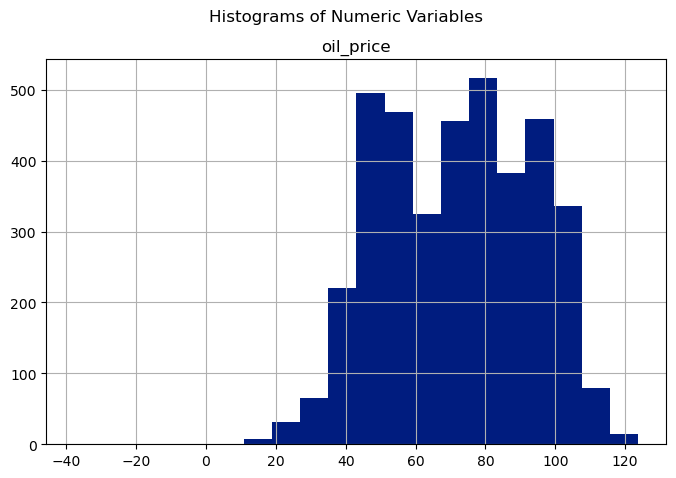

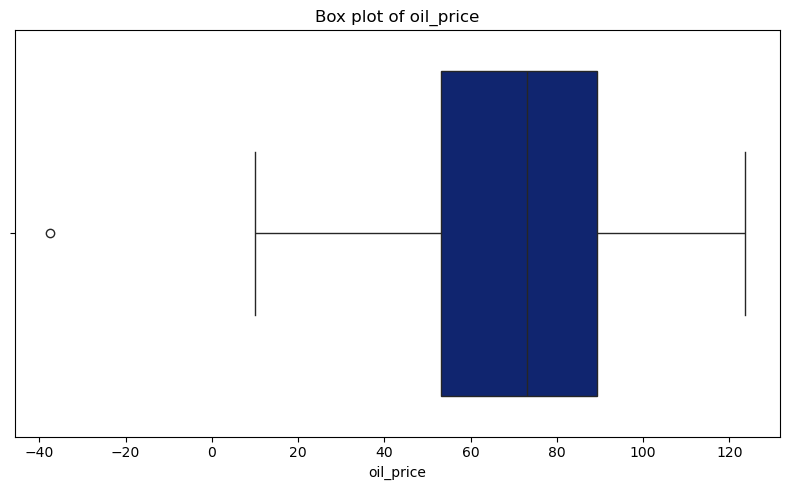

In [104]:
# visualize the oil_price
visualize_numeric(df_Oil_Price)

In [106]:
df_Oil_Price_clean = df_Oil_Price.copy()
df_Oil_Price_clean.sort_values(by='date', inplace=True)
df_Oil_Price_clean.head()

,date,oil_price
3856,2010-01-04,81.51
3855,2010-01-05,81.77
3854,2010-01-06,83.18
3853,2010-01-07,82.66
3852,2010-01-08,82.75


<Figure size 1400x700 with 0 Axes>

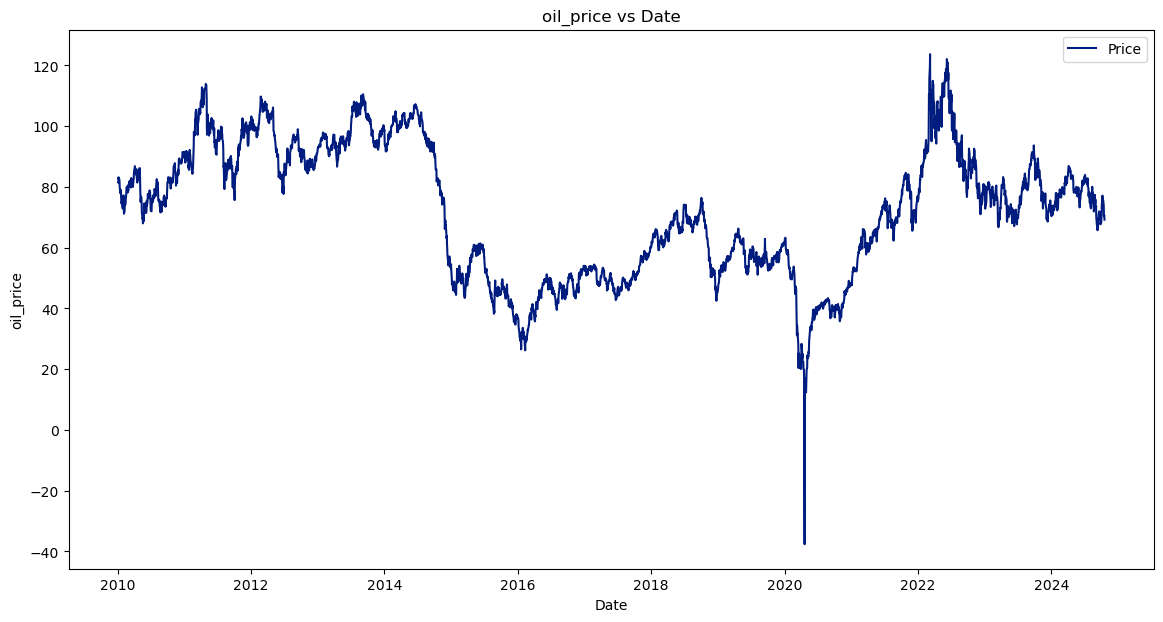

In [108]:
# visualization of the oil_price price over time
plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(14, 7))

plt.figure(figsize=(14, 7))
plt.plot(df_Oil_Price_clean['date'],df_Oil_Price_clean['oil_price'],label='Price')
plt.title('oil_price vs Date')
plt.xlabel('Date')
plt.ylabel('oil_price')
plt.legend()
plt.show();

### Data cleaning and preprocessing of Bond_Yield dataset

In [110]:
# make a copy of the dataframe
df_Bond_Yield=Bond_Yield.copy()
df_Bond_Yield.head()

,Date,Price,Open,High,Low,Change %
0,10/18/2024,4.075,4.093,4.118,4.065,-0.51%
1,10/17/2024,4.096,4.022,4.100,4.018,1.99%
2,10/16/2024,4.016,4.037,4.043,3.995,-0.54%
3,10/15/2024,4.038,4.100,4.104,4.026,-0.86%
4,10/11/2024,4.073,4.069,4.118,4.059,-0.51%


In [116]:
# dimension of the dataframe
df_Bond_Yield.shape

(3865, 6)

In [118]:
df_Bond_Yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3865 non-null   object 
 1   Price     3865 non-null   float64
 2   Open      3865 non-null   float64
 3   High      3865 non-null   float64
 4   Low       3865 non-null   float64
 5   Change %  3865 non-null   object 
dtypes: float64(4), object(2)
memory usage: 181.3+ KB


In [120]:
df_Bond_Yield.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')

In [122]:
# remove the unwanted column and rename the column to match with others
df_Bond_Yield = df_Bond_Yield.drop(columns=['Open', 'High', 'Low', 'Change %']).rename(columns={'Date':'date','Price':'bond_yield_price'})
df_Bond_Yield.head()

,date,bond_yield_price
0,10/18/2024,4.075
1,10/17/2024,4.096
2,10/16/2024,4.016
3,10/15/2024,4.038
4,10/11/2024,4.073


In [124]:
# change the date column data type to datetime
df_Bond_Yield['date'] = pd.to_datetime(df_Bond_Yield['date'])
df_Bond_Yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              3865 non-null   datetime64[ns]
 1   bond_yield_price  3865 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 60.5 KB


In [126]:
# check for duplicated records
df_Bond_Yield.duplicated().sum()

0

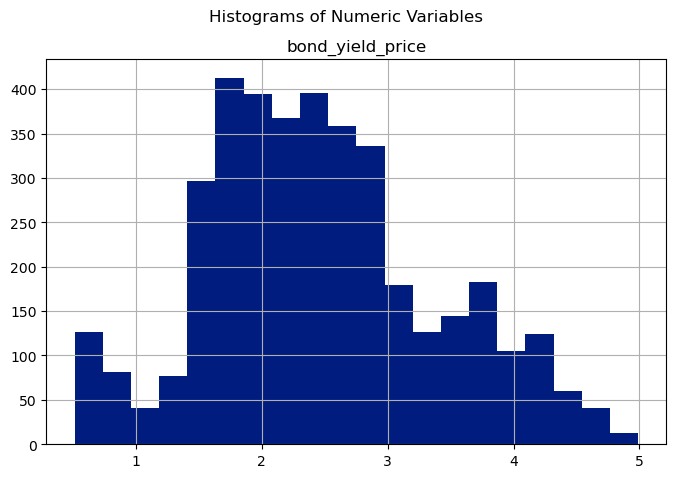

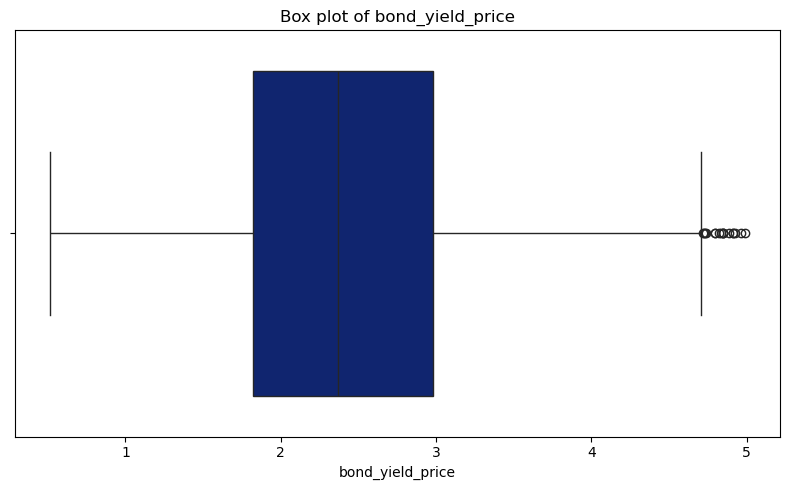

In [128]:
# visualize the bond yield dataset distribution
visualize_numeric(df_Bond_Yield)

In [130]:
df_Bond_Yield_clean = df_Bond_Yield.copy()
df_Bond_Yield_clean.sort_values(by='date', inplace=True)
df_Bond_Yield_clean.head()

,date,bond_yield_price
3864,2010-01-04,3.823
3863,2010-01-05,3.763
3862,2010-01-06,3.829
3861,2010-01-07,3.827
3860,2010-01-08,3.836


<Figure size 1400x700 with 0 Axes>

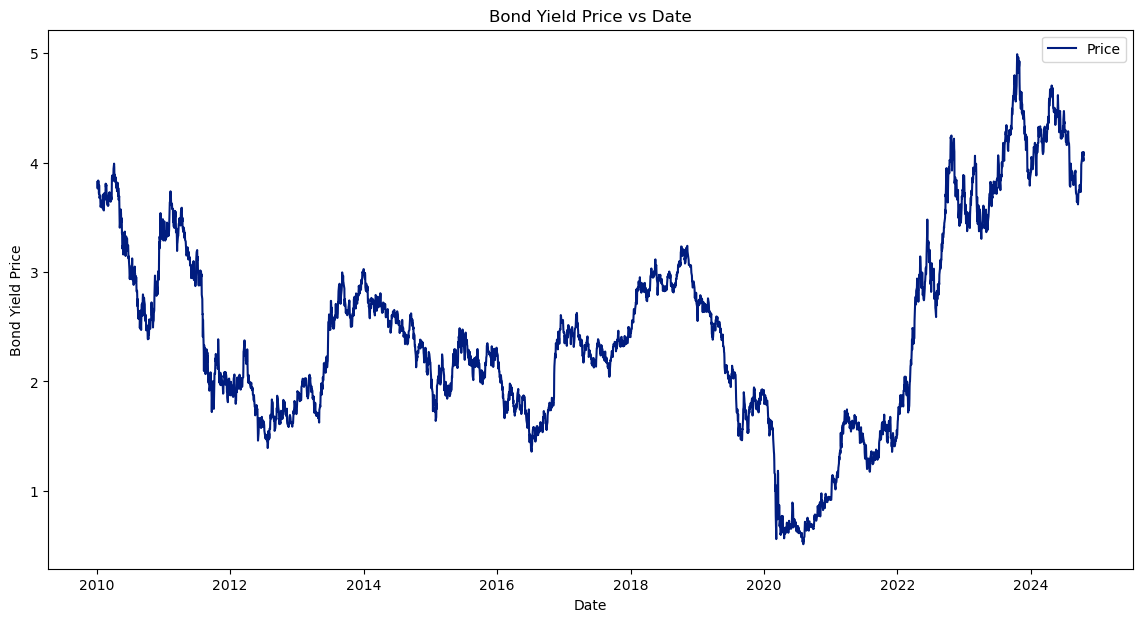

In [132]:
# visualization of the bond yield over time
plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(14, 7))

plt.figure(figsize=(14, 7))
plt.plot(df_Bond_Yield_clean['date'],df_Bond_Yield_clean['bond_yield_price'],label='Price')
plt.title('Bond Yield Price vs Date')
plt.xlabel('Date')
plt.ylabel('Bond Yield Price')
plt.legend()
plt.show();

### Data cleaning and preprocessing of interest rate dataset

In [136]:
# make a copy of the dataset
df_interest_rate = interest_rate.copy()
df_interest_rate.head()

,date,value
0,9/18/2024,5.33
1,9/17/2024,5.33
2,9/16/2024,5.33
3,9/13/2024,5.33
4,9/12/2024,5.33


In [138]:
df_interest_rate.shape

(24927, 2)

In [140]:
df_interest_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24927 entries, 0 to 24926
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    24927 non-null  object 
 1    value  24927 non-null  float64
dtypes: float64(1), object(1)
memory usage: 389.6+ KB


In [142]:
# rename the column to match with others
df_interest_rate.rename(columns={' value': 'interest_rate'}, inplace=True)
df_interest_rate.head()

,date,interest_rate
0,9/18/2024,5.33
1,9/17/2024,5.33
2,9/16/2024,5.33
3,9/13/2024,5.33
4,9/12/2024,5.33


In [144]:
# change the date datatype to datetime
df_interest_rate['date']=pd.to_datetime(df_interest_rate['date'])
df_interest_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24927 entries, 0 to 24926
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           24927 non-null  datetime64[ns]
 1   interest_rate  24927 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 389.6 KB


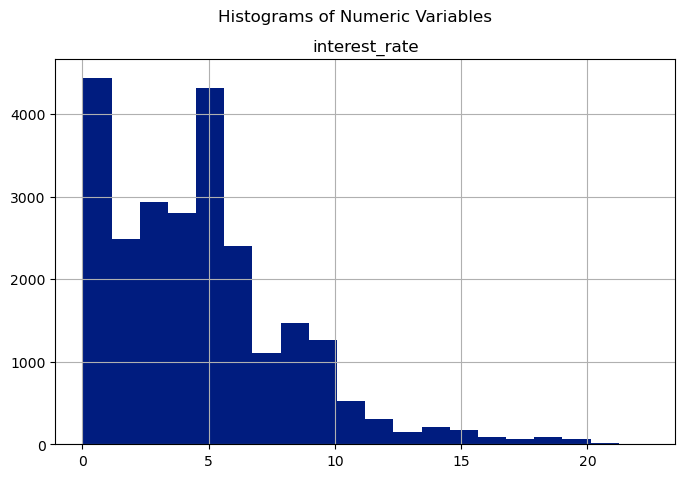

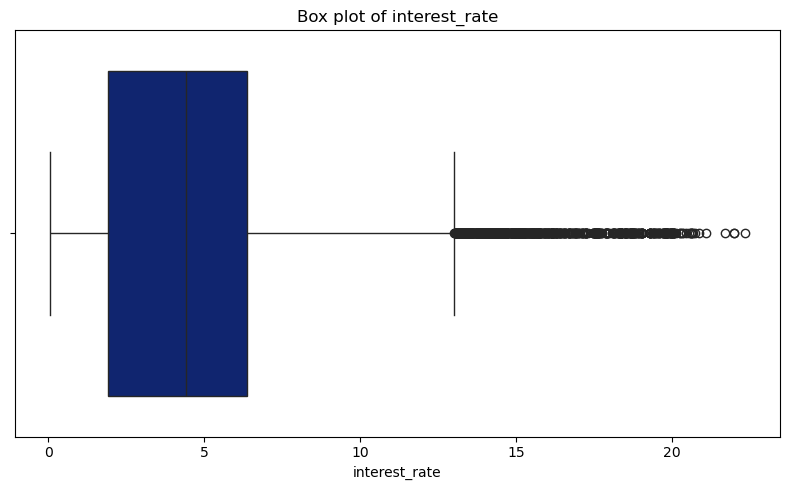

In [146]:
# visualize the dataset distribution
visualize_numeric(df_interest_rate)

<Figure size 1400x700 with 0 Axes>

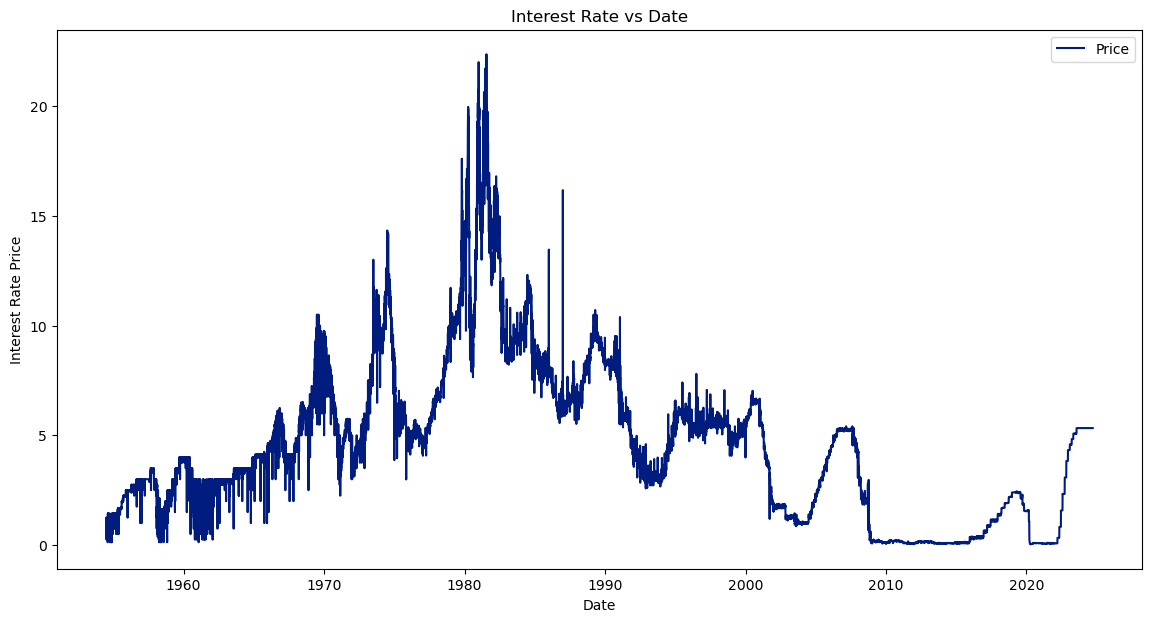

In [57]:
# visualization of the interest rate over time
plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(14, 7))

plt.figure(figsize=(14, 7))
plt.plot(df_interest_rate['date'],df_interest_rate['interest_rate'],label='Price')
plt.title('Interest Rate vs Date')
plt.xlabel('Date')
plt.ylabel('Interest Rate Price')
plt.legend()
plt.show();

In [148]:
#check for duplicated records
df_interest_rate.duplicated().sum()

0

In [152]:
df_interest_rate_clean = df_interest_rate.copy()
df_interest_rate_clean.sort_values(by='date', inplace=True)
df_interest_rate_clean.head()

,date,interest_rate
24926,1954-07-01,1.13
24925,1954-07-02,1.25
24924,1954-07-03,1.25
24923,1954-07-04,1.25
24922,1954-07-05,0.88


### Data cleaning and preprocessing of inflation rate dataset

In [158]:
# make a copy of the dataset
df_inflation_rate = inflation_rate.copy()
df_inflation_rate.head()

,date,inflation_rate
0,2010-01-04,2.38
1,2010-01-05,2.34
2,2010-01-06,2.37
3,2010-01-07,2.41
4,2010-01-08,2.42


In [160]:
# dataset dimension
df_inflation_rate.shape

(3860, 2)

In [170]:
df_inflation_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3860 entries, 0 to 3859
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            3860 non-null   datetime64[ns]
 1   inflation_rate  3703 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 60.4 KB


In [172]:
# change the date datatype to datetime
df_inflation_rate['date'] = pd.to_datetime(df_inflation_rate['date'])
df_inflation_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3860 entries, 0 to 3859
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            3860 non-null   datetime64[ns]
 1   inflation_rate  3703 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 60.4 KB


In [174]:
# statistical overview of the dataset
df_inflation_rate.describe()

,date,inflation_rate
count,3860,3703.000000
mean,2017-05-27 12:00:00,2.051153
min,2010-01-04 00:00:00,0.500000
25%,2013-09-15 06:00:00,1.800000
50%,2017-05-27 12:00:00,2.120000
75%,2021-02-05 18:00:00,2.300000
max,2024-10-18 00:00:00,3.020000
std,NaN,0.349507


In [66]:
df_inflation_rate.duplicated().sum()

0

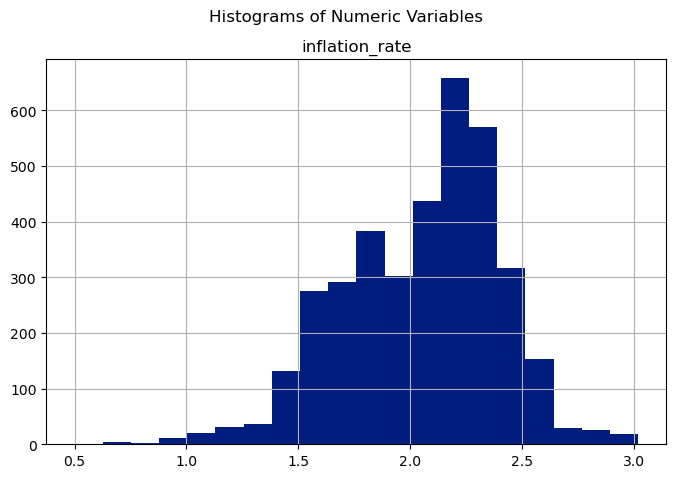

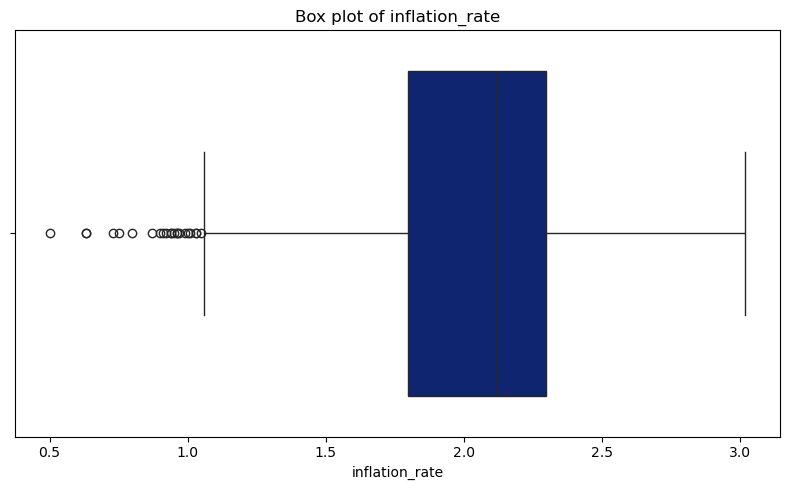

In [67]:
visualize_numeric(df_inflation_rate)

In [180]:
df_daily_inflation_rate_clean = df_inflation_rate.copy()
df_daily_inflation_rate_clean.sort_values(by='date', inplace=True)
df_daily_inflation_rate_clean.head()

,date,inflation_rate
0,2010-01-04,2.38
1,2010-01-05,2.34
2,2010-01-06,2.37
3,2010-01-07,2.41
4,2010-01-08,2.42


<Figure size 1400x700 with 0 Axes>

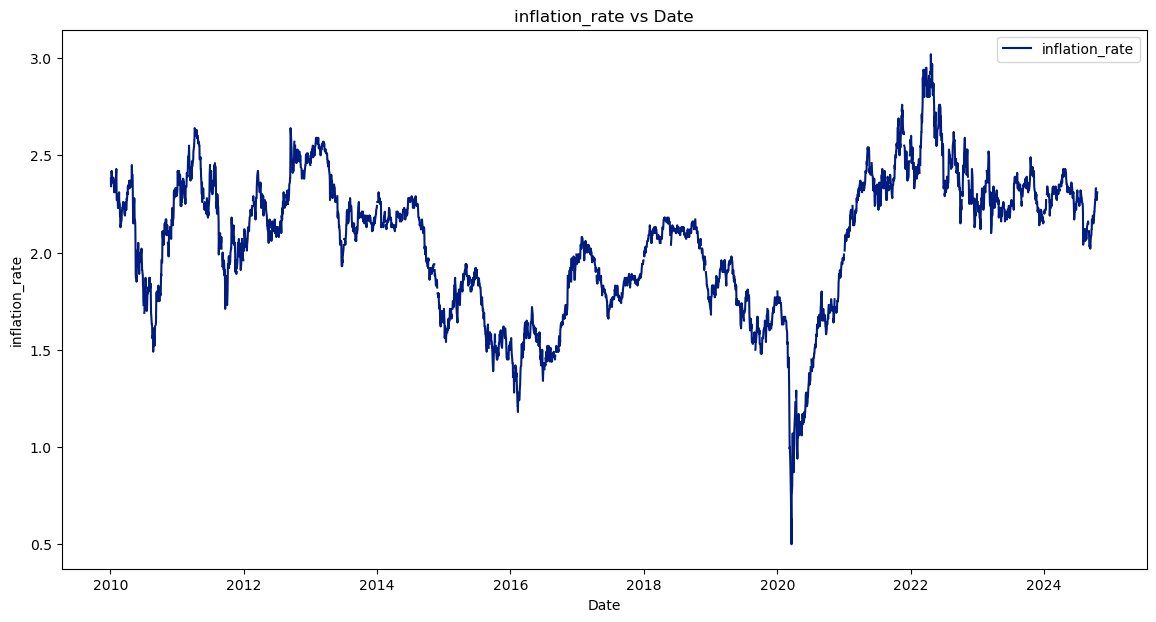

In [182]:
# visualization of the inflation rate over time
plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(14, 7))

plt.figure(figsize=(14, 7))
plt.plot(df_daily_inflation_rate_clean['date'],df_daily_inflation_rate_clean['inflation_rate'],label='inflation_rate')
plt.title('inflation_rate vs Date')
plt.xlabel('Date')
plt.ylabel('inflation_rate')
plt.legend()
plt.show();

#### Merging all the additional feature to a date range.

In [184]:
# Create a date range for this analysis
start_date = '2015-01-01'
end_date = '2024-10-16'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Convert to DataFrame
dates_df = pd.DataFrame(date_range, columns=['date'])
dates_df.head()

,date
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05


In [186]:
dates_df.shape

(3577, 1)

In [188]:
# merge the additional feature to the dataframe
additiona_features = pd.merge(dates_df, df_US_Dollar_Index_clean, on='date', how='left')
additiona_features = pd.merge(additiona_features, df_Oil_Price_clean, on='date', how='left')
additiona_features = pd.merge(additiona_features, df_Bond_Yield_clean, on='date', how='left')
additiona_features = pd.merge(additiona_features, df_interest_rate_clean, on='date', how='left')
additiona_features = pd.merge(additiona_features, df_daily_inflation_rate_clean, on='date', how='left')


additiona_features.shape


(3577, 6)

In [190]:
additiona_features.head()

,date,usd_rate,oil_price,bond_yield_price,interest_rate,inflation_rate
0,2015-01-01,90.27,54.56,2.170,0.06,NaN
1,2015-01-02,91.08,52.69,2.114,0.12,1.71
2,2015-01-03,NaN,NaN,NaN,0.12,NaN
3,2015-01-04,NaN,NaN,NaN,0.12,NaN
4,2015-01-05,91.38,50.04,2.034,0.12,1.64


In [192]:
additiona_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              3577 non-null   datetime64[ns]
 1   usd_rate          2556 non-null   float64       
 2   oil_price         2583 non-null   float64       
 3   bond_yield_price  2557 non-null   float64       
 4   interest_rate     2828 non-null   float64       
 5   inflation_rate    2450 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 167.8 KB


In [194]:
additiona_features.dropna(inplace=True)
additiona_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2429 entries, 1 to 3548
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              2429 non-null   datetime64[ns]
 1   usd_rate          2429 non-null   float64       
 2   oil_price         2429 non-null   float64       
 3   bond_yield_price  2429 non-null   float64       
 4   interest_rate     2429 non-null   float64       
 5   inflation_rate    2429 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 132.8 KB


In [196]:
additiona_features.isnull().sum()

date                0
usd_rate            0
oil_price           0
bond_yield_price    0
interest_rate       0
inflation_rate      0
dtype: int64

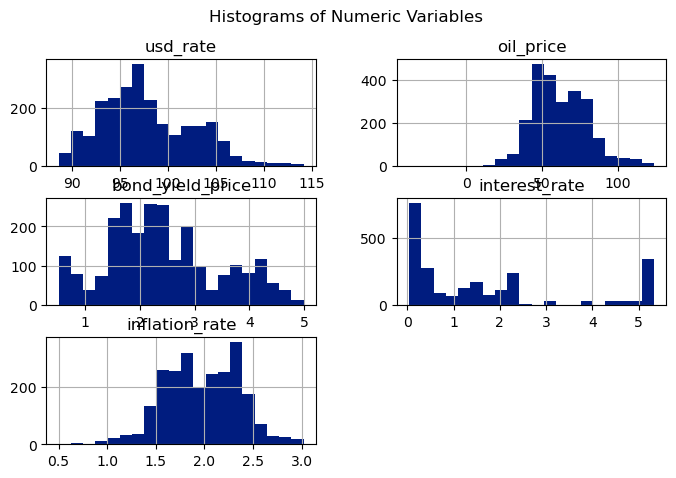

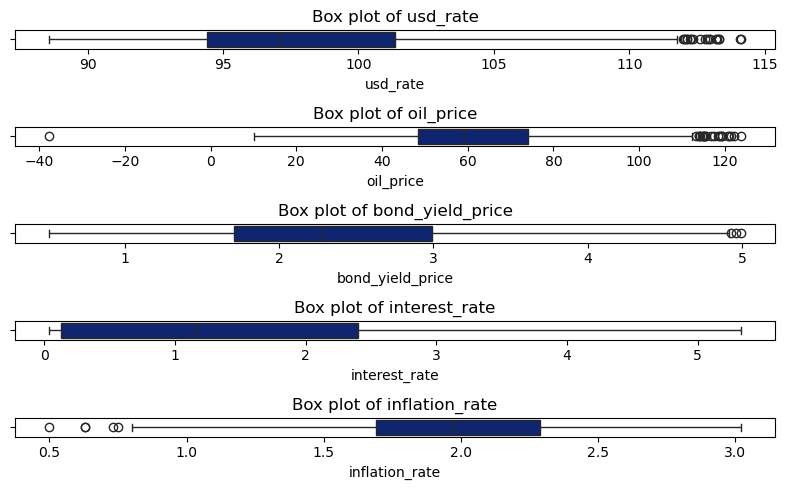

In [198]:
visualize_numeric(additiona_features)

In [200]:
additiona_features.describe()

,date,usd_rate,oil_price,bond_yield_price,interest_rate,inflation_rate
count,2429,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000
mean,2019-11-09 06:00:26.677645056,97.865006,61.744533,2.426475,1.696468,1.978135
min,2015-01-02 00:00:00,88.590000,-37.630000,0.512000,0.040000,0.500000
25%,2017-06-06 00:00:00,94.390000,48.330000,1.709000,0.130000,1.690000
50%,2019-11-07 00:00:00,97.120000,59.240000,2.287000,1.160000,1.970000
75%,2022-04-13 00:00:00,101.350000,74.150000,2.993000,2.400000,2.290000
max,2024-09-18 00:00:00,114.110000,123.700000,4.990000,5.330000,3.020000
std,NaN,4.811973,18.314616,1.025264,1.828216,0.382687


In [202]:
additiona_features_clean = additiona_features.copy()
additiona_features_clean.head()

,date,usd_rate,oil_price,bond_yield_price,interest_rate,inflation_rate
1,2015-01-02,91.08,52.69,2.114,0.12,1.71
4,2015-01-05,91.38,50.04,2.034,0.12,1.64
5,2015-01-06,91.50,47.93,1.938,0.12,1.56
6,2015-01-07,91.89,48.65,1.969,0.12,1.57
7,2015-01-08,92.37,48.79,2.018,0.12,1.62


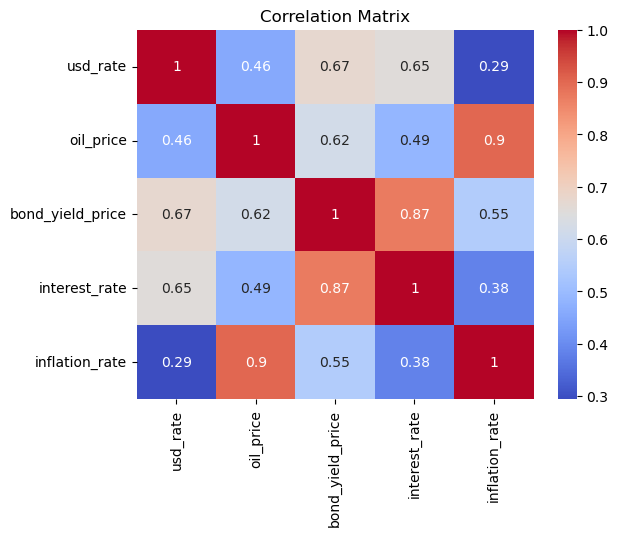

In [204]:
# Calculate the correlation matrix
corr_matrix = additiona_features_clean.drop(columns='date').corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [206]:
#outputing the clean data
additiona_features_clean.to_csv('result_Data/additional_features.csv', index=False)